# **Customer Churn Prediction**

# Table of Contents

##### **[1. Project Overview](#1.-Project-Overview)**
##### **[2. Data Preparation](#2.-Data-Preparation)**
##### **[3. Neural Network](#3.-Neural-Network)**
##### **[4. ML Algorithms](#4.-ML-Algorithms)**
##### **[5. Churn Rate Categories](#5.-Churn-Rate-Categories)**
##### **[6. Segmentation](#6.-Segmentation)**
##### **[7. Outlook](#7.-Outlook)**

### **1. Project Overview:**

#### In the telecommunications sector, customer retention is a primary driver of long-term profitability.Acquiring a new customer is significantly more expensive than retaining an existing one.Therefore, the ability to accurately predict when a customer is at risk of churning or discontinuing their service is a critical business advantage.

#### This project addresses this challenge by developing a machine learning model to identify customers with a high probability of churning.Our goal is to move beyond reactive measures and create a proactive framework.By understanding the key drivers of churn and identifying,we can empower the business to deploy targeted strategies that are both effective and cost-effective.

#### **1.2 Objective:** The primary goal is to build a high-performance machine learning model that can accurately predict which customers are at risk of churning.The insights from this analysis will be translated into actionable,data-driven recommendations for the marketing, sales, and customer success departments to proactively reduce churn.

##### **1.2.1 Research Questions**
  * Which customers have a very high/high/middle/very low risk to churn (classification)?
  * Which customers with (very) high churn rate are worth to be retained (segmentation)?

#### **1.3 Methodology:** My approach involves a multi-phase process:

   * **Data Discovery:** Loading and understanding the dataset's structure.
   * **Data Preparation:** Cleaning and transforming data for analysis.
   * **Exploratory Analysis:** Visualizing data to uncover patterns and churn drivers.
   * **Feature Engineering:** Preparing data for machine learning.
   * **Predictive Modeling:** Training and evaluating a classification model.
   * **Strategic Recommendations:** Translating model insights into business actions. 
    

### **2. Data Preparation**

#### **2.1 Import Libraries**

 The first step in any data project is to set up the environment by         importing the necessary libraries and loading the data. Then I perform a preliminary         inspection to understand the dataset's size, features, and data types. This initial             review is crucial for identifying potential data quality issues that need to be           addressed.
  
To execute the analysis,a robust stack of Python libraries required.For that , I use   **Pandas**and **Numpy** for data manipulation,**Matplotlib** and **Seaborn** for visual storytelling, and **Scikit-Learn** and **XGBoost** for the heavy lifting in predictive modelling and evaluation.

In [1]:
# import libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from numpy import hstack
from numpy import vstack
from numpy import asarray
import seaborn as sns
from catboost import CatBoostClassifier
from collections import OrderedDict
cmaps = OrderedDict()
import os
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from catboost import CatBoostClassifier





In [2]:
import tensorflow as tf
print(tf.__version__)

2.20.0


#### **2.2Define Colors**

Here a consistent color palette for charts are established to interpret visualizations 
quickly. 

In [3]:
# definition of colors
custom_colors=['#c14953','#d96548','#f2a553','#f3c969','#98e2c6','#86c1b2','#74a09e']
custom_colors1=['#74a09e','#86c1b2','#98e2c6','#f3c969','#f2a553','#d96548','#c14953']
custom_colors_yes_no_gray=['#595959','#D9D9D9']
customPalette = sns.set_palette(sns.color_palette(custom_colors))

#### **2.3 Load Data**

In this step, the Telco customer churn dataset is loaded from the 'data' folder into a pandas DataFrame:

In [4]:
df = pd.read_csv("data/Telco_customer_churn_cleaned.csv") 



In [5]:
#convert data types and impute missing values with zero
df["Total Charges"] = df["TotalCharges"].replace("",0).astype("float32")
df["SatisfactionScore"] = df["Satisfaction Score"].astype("object")
df["SeniorCitizen"] = df["SeniorCitizen"].replace(0,"0").replace(1,"1")

 I used the head() function to show the first 5 rows:

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Category,Total Charges,SatisfactionScore
0,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,0.0,0,20.94,129.09,1,Churned,Competitor,108.150002,1
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,0.0,0,18.24,169.89,2,Churned,Other,151.649994,2
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,0.0,0,97.20,917.70,3,Churned,Other,820.500000,3
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,0.0,0,136.92,3182.97,3,Churned,Other,3046.050049,3
4,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,0.0,0,2172.17,7208.47,1,Churned,Competitor,5036.299805,1


and the info() functon to show the data types:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customerID                         7043 non-null   object 
 1   gender                             7043 non-null   object 
 2   SeniorCitizen                      7043 non-null   object 
 3   Partner                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   tenure                             7043 non-null   int64  
 6   PhoneService                       7043 non-null   object 
 7   MultipleLines                      7043 non-null   object 
 8   InternetService                    7043 non-null   object 
 9   OnlineSecurity                     7043 non-null   object 
 10  OnlineBackup                       7043 non-null   object 
 11  DeviceProtection                   7043 non-null   objec

After loading the data, the first rows and basic structure are inspected to confirm that
column names, data types, and the target churn label are correctly loaded.This quick check
also highlights potential issues such as missing values,inconsistent encodings, or mixed 
data types that must be resolved before modeling.

#### **2.4 Data Cleaning**

Before modeling, a basic data cleaning step is applied to make sure the dataset is consistent and ready for
analysis.This includes checking for duplicate customer records, handling missing values in key numeric fields,
and standardizing some categorical encodings.The goal is to improve data quality without changing the original 
business meaning of the variables.

In [8]:
# Basic data cleaning

# 1) Drop exact duplicate rows based on customerID and all features
initial_rows = df.shape[0]
df = df.drop_duplicates()
cleaned_rows = df.shape[0]
print(f"Dropped {initial_rows - cleaned_rows} duplicate rows.")

# 2) Check remaining missing values per column
missing_counts = df.isna().sum().sort_values(ascending=False)
print("Missing values per column (top 10):")
print(missing_counts.head(10))

# 3) For numeric monetary fields, fill remaining missing values with 0
numeric_fill_zero_cols = [
    "TotalCharges", 
    "Total Revenue", 
    "Total Refunds", 
    "Total Extra Data Charges", 
    "Total Long Distance Charges"
]
for col in numeric_fill_zero_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)

# 4) For satisfaction score, drop rows with missing values (very few in this dataset)
if "Satisfaction Score" in df.columns:
    before = df.shape[0]
    df = df.dropna(subset=["Satisfaction Score"])
    after = df.shape[0]
    print(f"Dropped {before - after} rows with missing Satisfaction Score.")

# 5) Strip whitespace from object columns safely
obj_cols = df.select_dtypes(include="object").columns

for col in obj_cols:
    df[col] = df[col].astype(str).str.strip()



Dropped 0 duplicate rows.
Missing values per column (top 10):
Churn Reason    5174
Offer           3877
customerID         0
City               0
Lat Long           0
Latitude           0
Longitude          0
Age                0
Under 30           0
Married            0
dtype: int64
Dropped 0 rows with missing Satisfaction Score.


The cleaning step confirms the absence of exact duplicate records, removes a small number of rows with
missing satisfaction scores, and fills any remaining gaps in monetary fields with zeros. In addition, leading
and trailing spaces are stripped from text columns so that categories such as “Yes” and “No” are treated 
consistently. These adjustments slightly reduce the dataset size but keep all core patterns and business 
meaning intact, ensuring that the subsequent feature engineering and modeling steps operate on a clean and 
reliable dataset.


#### **2.5 Define Variables**

 To simplify the code later on,columns or variables are written like this:

In [9]:
# variable definitions
customer_id = df["customerID"]
gender = df["gender"]
senior_citizen = df["SeniorCitizen"]
partner = df["Partner"]
dependents = df["Dependents"]
tenure = df["tenure"]
phone_service = df["PhoneService"]
multiple_lines = df["MultipleLines"]
internet_service = df["InternetService"]
online_security = df["OnlineSecurity"]
online_backup = df["OnlineBackup"]
device_protection = df["DeviceProtection"]
tech_support = df["TechSupport"]
streaming_tv = df["StreamingTV"]
streaming_movies = df["StreamingMovies"]
contract = df["Contract"]
paperless_billing = df["PaperlessBilling"]
payment_method = df["PaymentMethod"]
monthly_charges = df["MonthlyCharges"]
total_charges = df["TotalCharges"]
churn = df["Churn"] # churn yes/no
churn_rate = df["churn_rate"]
cltv = df["CLTV"]
churn_reason = df["Churn Reason"]
country = df["Country"]
state = df["State"]
city = df["City"]
zip_code = df["Zip Code"]
lat_long = df["Lat Long"]
latitude = df["Latitude"]
longitude = df["Longitude"]
age = df["Age"]
married = df["Married"]
referred_a_friend = df["Referred a Friend"]
number_of_referrals = df["Number of Referrals"]
offer = df["Offer"]
avg_monthly_long_distance_charges = df["Avg Monthly Long Distance Charges"]
avg_monthly_gb_download = df["Avg Monthly GB Download"]
streaming_music = df["Streaming Music"]
premium_tech_support = df["Premium Tech Support"]
unlimited_data = df["Unlimited Data"]
total_refunds = df["Total Refunds"]
total_extra_data_charges = df["Total Extra Data Charges"]
total_long_distance_charges = df["Total Long Distance Charges"]
total_revenue = df["Total Revenue"]
satisfaction_score = df["Satisfaction Score"]
customer_status = df["Customer Status"]
churn_category = df["Churn Category"]




#### **2.6 Split Features**

Features are split into numeric and categorical features. Creating these groups makes it easier to apply the correct preprocessing to each type of variable later. Shape and head for numeric resp.categorical features are shown.

In [10]:
# numeric features
num_features = df[["tenure", "MonthlyCharges", "TotalCharges", "CLTV", "Total Revenue"]]

In [11]:
num_features.head()

,tenure,MonthlyCharges,TotalCharges,CLTV,Total Revenue
0,2,53.85,108.15,3239,129.09
1,2,70.70,151.65,2701,169.89
2,8,99.65,820.50,5372,917.70
3,28,104.80,3046.05,5003,3182.97
4,49,103.70,5036.30,5340,7208.47


In [12]:
num_features.shape

(7043, 5)

In [13]:
cat_features = df[["gender","SeniorCitizen","Partner","Dependents","PhoneService",
                   "MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                   "DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
                   "Contract","PaperlessBilling","PaymentMethod","Satisfaction Score"]]

In [14]:
cat_features.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Satisfaction Score
0,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1
1,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,2
2,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3
3,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,3
4,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),1


In [15]:
cat_features.shape

(7043, 17)

#### **2.7 Feature Engineering**

Machine Learning algorithms require numeric inputs.This section converts categorical features into dummy variables.

#### **2.7.1 Create Dummy Variables for Categorical Features**

Since ML algorithms require numeric values for the input vector X, the
categorical features are first converted into numeric values. The Pandas function pd.get_dummies is used for this and it converts categorical variables to a series of zeros and ones.

In [16]:
df_dummy_cat = pd.get_dummies(cat_features).astype(int)

In [17]:
df_dummy_cat.head()

,Satisfaction Score,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,2,1,0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,3,1,0,1,0,1,0,1,0,0,...,1,1,0,0,0,1,0,0,1,0
3,3,1,0,1,0,0,1,1,0,0,...,1,1,0,0,0,1,0,0,1,0
4,1,0,1,1,0,1,0,1,0,0,...,1,1,0,0,0,1,1,0,0,0


In [18]:
df_dummy_cat.shape

(7043, 44)

#### **2.7.2 Normalizing Numeric Variables**

Numeric variables must also be adjusted before being used in a machine learning model, because they typically lie on very different scales.Some algorithms, like decision trees, are largely unaffected by the absolute size of feature values, whereas others(notably neural networks) are highly sensitive to these differences. For this reason, the numeric inputs are normalized.

Although these points are not extremely far from the rest of the data,they still require attention when building churn prediction models later on.To address this, the Standard Scalar is applied here,since it deals with outliers more robustly than the MinMaxScalar.Unlike MinMaxScaler,which maps values into a fixed interval,StandardScaler shifts each feature to have a mean of 0 and a variance of 1.


In [19]:
# define data
x_num = num_features
# define standard scaler
scaler = StandardScaler()
# transform data
x_num_scaled = scaler.fit_transform(x_num)
# print(x_num_scaled)
df_num_features = pd.DataFrame(x_num_scaled)
df_num_features.set_axis(['Tenure','MonthlyCharges','TotalCharges',"CLTV","Total Revenue"],
                         axis='columns')

,Tenure,MonthlyCharges,TotalCharges,CLTV,Total Revenue
0,-1.236724,-0.362660,-0.958066,-0.981675,-1.014062
1,-1.236724,0.197365,-0.938874,-1.436462,-0.999821
2,-0.992402,1.159546,-0.643789,0.821409,-0.738806
3,-0.177995,1.330711,0.338085,0.509483,0.051864
4,0.677133,1.294151,1.216150,0.794358,1.456925
...,...,...,...,...,...
7038,1.613701,-1.449476,-0.379565,0.765617,0.001798
7039,-0.340876,0.665992,-0.127605,-1.910691,-0.079200
7040,1.613701,1.277533,2.242606,0.980330,2.240369
7041,-0.870241,-1.168632,-0.852932,-1.358692,-0.947703


In [20]:
df_num_features.head()

,0,1,2,3,4
0,-1.236724,-0.362660,-0.958066,-0.981675,-1.014062
1,-1.236724,0.197365,-0.938874,-1.436462,-0.999821
2,-0.992402,1.159546,-0.643789,0.821409,-0.738806
3,-0.177995,1.330711,0.338085,0.509483,0.051864
4,0.677133,1.294151,1.216150,0.794358,1.456925


In [21]:
df_num_features.shape

(7043, 5)

#### **2.7.3 Concat Categorical and Numerical Features**

Once creating the categorical features and normalizing numerical features are processed seperately, we combine them 
back into a single feature matrix using pd.concat() function .

In [22]:
features = pd.concat([df_dummy_cat,df_num_features], axis=1)

In [23]:
features.head()

,Satisfaction Score,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,0,1,2,3,4
0,1,0,1,1,0,1,0,1,0,0,...,1,0,0,0,1,-1.236724,-0.362660,-0.958066,-0.981675,-1.014062
1,2,1,0,1,0,1,0,1,0,0,...,1,0,0,1,0,-1.236724,0.197365,-0.938874,-1.436462,-0.999821
2,3,1,0,1,0,1,0,1,0,0,...,1,0,0,1,0,-0.992402,1.159546,-0.643789,0.821409,-0.738806
3,3,1,0,1,0,0,1,1,0,0,...,1,0,0,1,0,-0.177995,1.330711,0.338085,0.509483,0.051864
4,1,0,1,1,0,1,0,1,0,0,...,1,1,0,0,0,0.677133,1.294151,1.216150,0.794358,1.456925


This consolidated dataset contains all engineered variables that will fed into the models,
ensuring that every relevant signal about customer behaviour is captured in one place.

In [24]:
features.shape

(7043, 49)

#### **2.7.4 Define X and Y Variables**

X variables corresponds to the features, whereas our y variables corresponds to our target 
variable(= churn rate)

In [25]:
# Define variables
x = features
y = churn_rate

In [26]:
x.head()

,Satisfaction Score,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,0,1,2,3,4
0,1,0,1,1,0,1,0,1,0,0,...,1,0,0,0,1,-1.236724,-0.362660,-0.958066,-0.981675,-1.014062
1,2,1,0,1,0,1,0,1,0,0,...,1,0,0,1,0,-1.236724,0.197365,-0.938874,-1.436462,-0.999821
2,3,1,0,1,0,1,0,1,0,0,...,1,0,0,1,0,-0.992402,1.159546,-0.643789,0.821409,-0.738806
3,3,1,0,1,0,0,1,1,0,0,...,1,0,0,1,0,-0.177995,1.330711,0.338085,0.509483,0.051864
4,1,0,1,1,0,1,0,1,0,0,...,1,1,0,0,0,0.677133,1.294151,1.216150,0.794358,1.456925


In [27]:
x.shape

(7043, 49)

In [28]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: churn_rate, dtype: int64

In [29]:
y.shape

(7043,)

#### **2.8 Train Test Split**

Before modeling,the dataset is splitted into a training and a test data set by the ratio
of 80/20.The training set is used to fit the models, and the test set evaluates how accurately the models can predict churn on new data.

In [30]:
# Split the dataset into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,
                                                 random_state = 48,stratify=y)

x_train.columns = x_train.columns.astype(str)
x_test.columns= x_test.columns.astype(str)

In [31]:
x_train.shape

(5634, 49)

In [32]:
x_test.shape

(1409, 49)

In [33]:
y_train.shape

(5634,)

In [34]:
y_test.shape

(1409,)

For the classification,I will train both a sequential keras network(section 3) and several
traditional machine-learning models(section4) and then evaluate them side by side.The 
top-performing approach will subsequently serve as the basis for the segmentation analysis
in section 5


## **3.Neural Network**

#### **3.1 Create Model**

The Sequential keras network uses **49** input variables.It starts with a hidden layer of **64** units,followed by a second hidden layer with **8** units.The final layer is a single neuronthat outputs the predicted churn outcome(yes or no).

To limit overfitting, the model applies the **dropout** technique.In this approach, a portion of neurons is a rondomly deactivated during each training iteration, meaning they are skipped when updating weights.The dropout rate is a hyperparameter that specifies the chance that a neuron is kept or ignored during training.This randomness is applied to the
input and hidden units,but not to the output neuron.Because of dropout,the network usually needs more epochs to converge,although each epoch is computationally cheaper. In this model,the dropout rate is set to 0.2 in the first layer and 0.1 in the second layer.

The first layers use the **Rectified Linear Unit (ReLU)** as their activation function,which supports fast and efficient learning.The output layer uses a sigmoid activation function, which supports fast and efficient learning. The output layer uses a 
**sigmoid** activation,ensuring the prediction lies between 0 and 1 and can therefore be interpreted as a probability of churn in percentage terms.

In [52]:
from tensorflow.keras import Input

nn_model2 = Sequential()

# 1) Add an explicit Input layer (NEW)
nn_model2.add(Input(shape=(49,)))   # or Input(shape=(48,))

# 2) Remove input_dim / input_shape from Dense (EDITED)
nn_model2.add(layers.Dense(64,
                           kernel_regularizer=tf.keras.regularizers.l2(0.0001),
                           activation="relu"))
nn_model2.add(layers.Dropout(0.2))
nn_model2.add(layers.Dense(8, activation="relu"))
nn_model2.add(layers.Dropout(0.2))
nn_model2.add(layers.Dense(1, activation="sigmoid"))


#### **3.2 Training**

Once the model  is defined, the next step is to train it. For training,we choose how many times the data should pass through the network(epochs) and how many Samples are processed before each weight update(batch size).An epoch means one full pass over the training set;here, we run 150 epochs,so the model sees the training data 150 
times.

Instead of updating the weights after every single example or only per full dataset, we
use **mini-batch gradient descent**.This approach processses a small group of sample at a time and then updates the model parameters.In this project, each mini-batch contains 
**32 records**(batch size=32),which offers a good balance between stable updates and computational efficiency.

Because the task is **binary classification**(churn yes/no), we select **binary cross-entropy** as the loss function,which is the standard choice for two-class problems.

For optimization,we rely on the **Adam** optimizer (Adaptive Moment Estimation).Adam keeps running averages of both the gradients and their squad values and uses these to adapt the learning rate in steep regions of the error surface and allows the model to move more directly toward a good solution.The initial learning rate is set to **0.0001**,
and after every 50 epochs learning rate is reduced by half,helping the training to start with larger steps and then progressively fine-tune the weights as learning progresses.

In [53]:
# Training
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(0.0001,decay_steps=
                                (x_train.shape[0]/32)*50,decay_rate=1,staircase=False)
## Time decay means for every 50 epochs the learning rate will half of 0.0001 value
def  get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)
def get_callbacks():
    return
[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                  patience=70,restore_best_weights=True)] 
nn_model2.compile(loss='binary_crossentropy', optimizer=get_optimizer(),
                                  metrics=['accuracy'])
nn_model2.summary()
history = nn_model2.fit(x_train, y_train, validation_data = (x_test,y_test),
                              epochs=150,batch_size=32,callbacks=get_callbacks(),verbose=0)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Layer (type)             ┃ Output Shape      ┃   Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ dense_3 (Dense)          │ (None, 64)        │     3,200 │
├──────────────────────────┼───────────────────┼───────────┤
│ dropout_2 (Dropout)      │ (None, 64)        │         0 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_4 (Dense)          │ (None, 8)         │       520 │
├──────────────────────────┼───────────────────┼───────────┤
│ dropout_3 (Dropout)      │ (None, 8)         │         0 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_5 (Dense)          │ (None, 1)         │         9 │
└──────────────────────────┴───────────────────┴───────────┘

 Total params: 3,729 (14.57 KB)

 Trainable params: 3,729 (14.57 KB)

 Non-trainable params: 0 (0.00 B)

To suppress warnings we run the following code:

In [54]:
warnings.filterwarnings("ignore")

The training process is plotted in the following step:

<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'ArrayLike | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

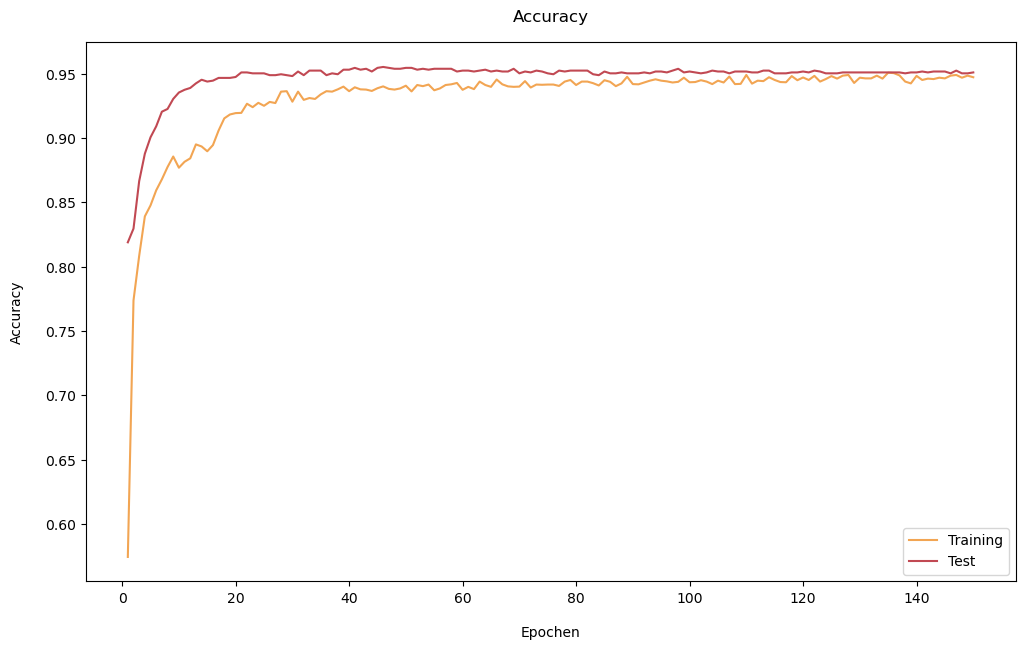

<Figure size 640x480 with 0 Axes>

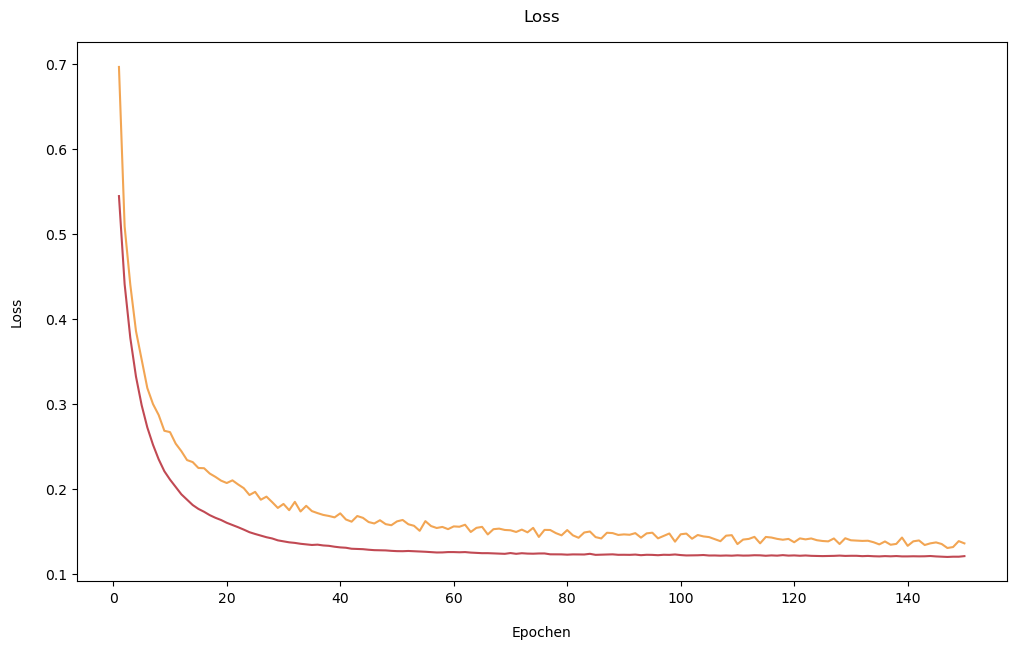

In [55]:
# Training process
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize = (12,7))
plt.plot(epochs, acc, color='#f2a553' , label='Training')
plt.plot(epochs, val_acc, 'b', color='#c14953', label='Test')
plt.title('Accuracy', pad = 15)
plt.grid(False)
plt.xlabel('Epochen',labelpad = 15)
plt.ylabel('Accuracy',labelpad =15)
plt.legend()
plt.figure()

plt.figure(figsize=(12,7))
plt.plot(epochs,loss,color='#f2a553',label='Training')
plt.plot(epochs,val_loss,'b',color='#c14953',label='Test')
plt.title('Loss', pad=15)
plt.grid(False)
plt.xlabel('Epochen',labelpad = 15)
plt.ylabel('Loss', labelpad = 15)
plt.figure

         

#### **3.3 Evalution**

#### **3.3.1 Accuracy Score**

To evaluate the neural network,we first compute the accuracy on the held-out test set.
Accuracy measures the share of customers whose churn status is correctly predicted.

In [58]:
# Evaluation

accuracy = nn_model2.evaluate(x_train, y_train, verbose=False)
print("Training Score:{:.4f}" .format(accuracy[0]))
print("Training Accuracy: {:.4f}" .format(accuracy[1]))

accuracy = nn_model2.evaluate(x_test,y_test, verbose=False)
print("Testing Score: {:.4f}" .format(accuracy[0]))
print("Testing Accuracy: {:.4f}" .format(accuracy[1]))





Training Score:0.1099
Training Accuracy: 0.9562
Testing Score: 0.1212
Testing Accuracy: 0.9510


Training and testing accuracy are close.
#### **The testing accuracy of the neural network is: 95.1%**

Note: The result can vary slightly each time you run the model

#### **3.3.2 ROC AUC Score**

**ROC** stands for "**receiver operating characteristic"** and is widely applied in binary classification problems.The ROC curve compares the "true positive rate(recall)" with the "false positive rate(specificity)".In order to compare different models, the areas under the curves can be compared (AUC= Area Under the Curve).The ROC AUC Score indicates how well a model distinguishes between positive and negative classes.An ideal classifier would achieve a ROC AUC score of 1, while a completely random classifier would score 0.5(see diagonal line in the graph below).A strong classifier therefore lies well above this diagonal, close to the upper-left corner. 

The ROC-AUC score evaluates how well the model seperates churners from non-churners at all
possible thresholds.A score closer to 1 means the model ranks true churners ahead of 
non-churners most of the time.This metric is particularly useful for churn projects 
because it reflects the model's ability to prioritize customers by risk.

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


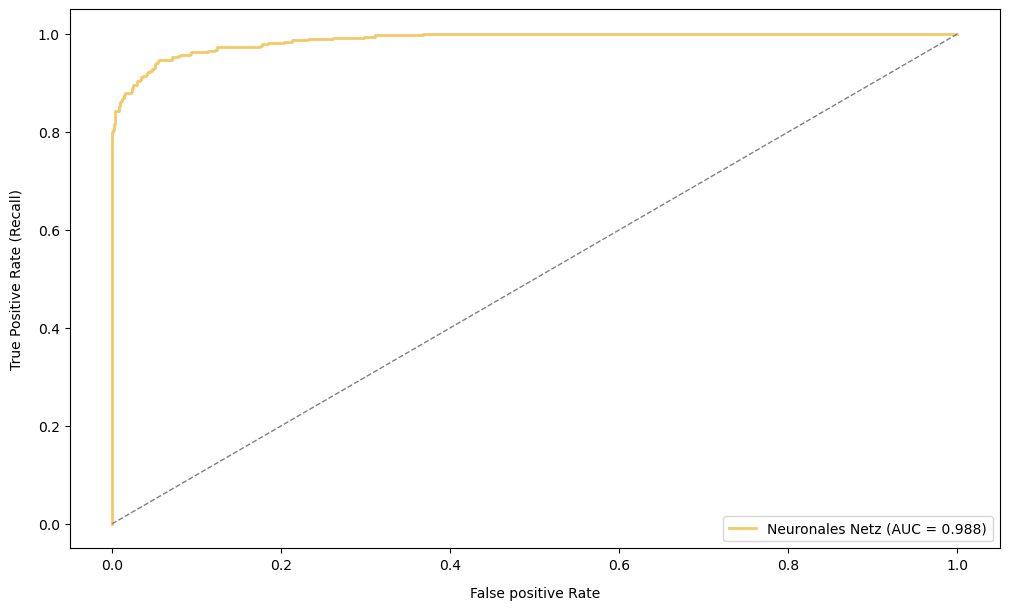

In [40]:
#ROC Curve with AUC Score

#make predictions for test dataset
x_test_np=x_test.to_numpy() #np = numpy
x_test_np_r=x_test_np.reshape(1409,49) # r=reshape
x_test_np_r=x_test_np_r.astype("float32")
#print(x_test_np_r)

yprednn_r_test = nn_model2.predict(x_test_np_r)
#print(yprednn_r_test)

#ROC Curve Input NN
y_scores_nn = yprednn_r_test
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_scores_nn)

# Plot ROC Curve
plt.figure(figsize=(12,7))
def plot_roc_curve(fpr, tpr, label=None,color=None):
    plt.plot(fpr, tpr, linewidth=2, label=label,color=color)
    plt.plot([0,1],[0,1], 'k--', linewidth=1.0,color='gray')
# Dashed diagonal

    plt.xlabel('False positive Rate', labelpad =10)
    plt.ylabel('True Positive Rate (Recall)', labelpad = 10)
    plt.legend(loc="lower right")
    plt.grid(False)

plot_roc_curve(fpr_nn, tpr_nn, "Neuronales Netz (AUC = %0.3f)"
               %(roc_auc_score(y_test, y_scores_nn)), "#f3c969")    

In [41]:
print(type(x_test_np_r))
print(getattr(x_test_np_r, "dtype","no-dtype-attr"))

<class 'numpy.ndarray'>
float32


The ROC graph above shows, the ROC curve is very far up on the left.
##### **The ROC AUC Score of the neural network is: 99.0%**

### **4. ML Algorithms**

To benchmark the neural network, we also train several classical machine learning classifiers such as logistic regression,k-nearest neighbors, support vector machines, random forests,gradient boosting, AdaBoost,Extra Trees, and CatBoost.These models offer different trade-offs in terms of interpretability, training time, and performnce,and comparing them helps identify the most reliable approach for deployment.

In [42]:
# Considered ML models
models = []
models.append(('RandomForest',RandomForestClassifier()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('KNeighbours',KNeighborsClassifier()))
models.append(('SVM',SVC(probability=True)))
models.append(('ExtraTrees', ExtraTreesClassifier()))
models.append(('AdaBoost',AdaBoostClassifier()))
models.append(('GradientBoosting',GradientBoostingClassifier()))
models.append(('CatBoost',CatBoostClassifier(logging_level='Silent')))

In [43]:
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []

# Set table to table to populate with performance results
col = ['Algorithm','ROC AUC Mean','ROC AUC STD','Accuracy Mean','Accuracy STD']
model_results = pd.DataFrame(columns=col)
i=0

# Using  k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=None)

    # Accuracy Scoring:
    cv_acc_results=model_selection.cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')

    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model,x_train,y_train,cv=kfold,scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i]=[name,
                      round(cv_auc_results.mean()*100,2),
                      round(cv_auc_results.std()*100,2),
                      round(cv_acc_results.mean()*100,2),
                      round(cv_acc_results.std()*100,2)
                     ]
    i+=1

model_results.sort_values(by=['ROC AUC Mean'],ascending=False)




,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
7,CatBoost,98.90,0.26,95.19,0.64
6,GradientBoosting,98.87,0.29,95.12,0.53
5,AdaBoost,98.83,0.32,94.85,0.69
3,SVM,98.49,0.36,94.85,0.71
0,RandomForest,97.92,0.51,95.19,0.61
4,ExtraTrees,97.35,0.65,93.97,0.49
2,KNeighbours,96.00,0.73,92.67,0.93
1,Naive Bayes,89.10,1.92,74.16,2.02


The comparison table shows, for each algorithms,mean ROC-AUC and accuracy along with their
variability across folds.Models with higher AUC and stable performance are better 
candidates for production.In this project,the best-performing algorithm can be selected
as the primary churn prediction model, while others serve as benchmarks or backups.

Considering the test accuracy (Accuracy Mean), Naive Bayes and K‑Neighbours achieve the weakest performance, with Naive Bayes in particular lagging far behind the other methods. All remaining models reach high and fairly similar accuracy values around 94–95%. In this set of algorithms, RandomForest attains the highest average accuracy (95.44%) with a relatively low accuracy standard deviation, while CatBoost, GradientBoosting and AdaBoost also remain in a narrow high‑performance band.  

Looking at the ROC AUC Mean, CatBoost, GradientBoosting and AdaBoost form the top group, with CatBoost showing the highest ROC AUC (98.90) and the smallest ROC AUC standard deviation (0.26), indicating both strong discrimination capability and stable performance across folds. GradientBoosting (98.87) and AdaBoost (98.83) follow very closely, and SVM still performs at a strong level (98.49), whereas K‑Neighbours and especially Naive Bayes clearly trail the other models in terms of ROC AUC as well.  

In direct comparison with the neural network, the neural model achieves a test accuracy of about 95.5% and a ROC AUC of roughly 99.0%, while CatBoost reaches an accuracy of approximately 95.2% and a ROC AUC close to 98.9%. These figures suggest that both approaches deliver excellent predictive quality, with a slight edge for the neural network in ROC AUC. However, the outcomes are not strictly one‑to‑one comparable, since k‑fold cross‑validation is applied to the classical ML algorithms, but not to the neural network, and the neural network results can fluctuate slightly between runs due to random initialization and stochastic training.  

Overall, both the neural network and CatBoost can be regarded as highly suitable candidates for churn prediction. For the subsequent step, the neural network model is taken forward as the primary basis for further analysis and segmentation.

#### **5. Churn Rate Categories**

Customers are now divided into the following classes according to their predicted churn rate:
*  very high (churn rate>=80%)
*  high(churn rate 60 to < 80%)
*  medium(churn rate 40 to <60%)
*  low(churn rate 20 to 40%)
*  very low(churn rate 0 to <20%)

Beyond individual predictions, it is useful to group customers into churn-risk categories. This section uses the model outputs and/or CLTV information to define categories that highlight which segments deserve immediate attention.
This churn categories create a practical bridge to marketing and retention actions.For instance,high-risk customers with high lifetime value can be prioritized for personal outreach, while moderate-risk customers can be targeted with automated  email campaigns or tailored offers.

In [44]:
# make predictions for the whole dataset
x_np = x.to_numpy() #np=numpy
x_np_r =x_np.reshape(7043,49) # r=reshape
#print(x_np_r)

yprednn_r=nn_model2.predict(x_np_r)
#print(yprednn_r)

#convert array into a dataframe,create colum "churn rate"
df_yprednn_r = pd.DataFrame(yprednn_r, columns=["Churn Rate"])
df_yprednn_r.shape

# Churn Rate distribution
# create list
list = []
for i in yprednn_r:
    if i >= 0.80:
        list.append("very high")
    elif i > 0.60:
        list.append("high")
    elif i > 0.40:
        list.append("medium")
    elif i > 0.20:
        list.append("low")
    else:
        list.append("very low")

# convert list into dataframe
df_i = pd.DataFrame(list,columns = ["Churn Rate Category"])
#print(df_i)
#df_i.shape

#concat columns
df_pred_i = pd.concat([df,df_yprednn_r,df_i], axis=1)
#print(df_pred_i)


221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


#### **6. Segmentation**

In the next stage, customers with a very high or high churn probability (≥ 60%) are examined to determine whether they are financially profitable. Retention interventions should be considered only for customers whose expected profitability justifies the associated costs.  

To distinguish between profitable and non‑profitable customers, the concept of **Customer Lifetime Value (CLTV)** is applied. **CLTV** is a key metric in corporate valuation and long‑term strategic planning, as it represents the total economic value of all purchases, interactions, and transactions a customer has made and is expected to make over the entire course of the relationship with the firm. A high **CLTV** indicates that a customer has generated substantial revenue in the past and is likely to continue doing so in the future. Empirical evidence in the literature often suggests that, on average, approximately 20% of customers are unprofitable, around 60% are profitable, and only about 20% are highly profitable for the company, as illustrated in the following example:

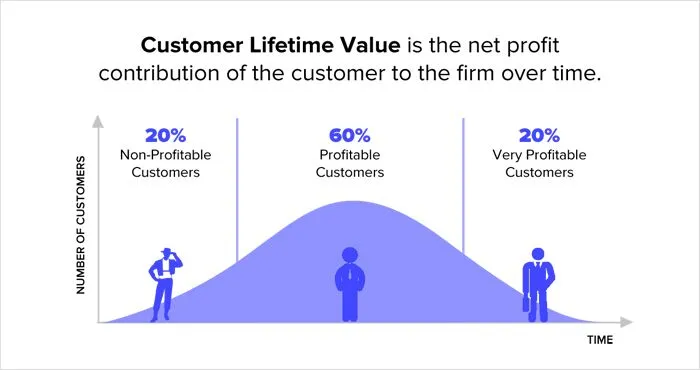

Source:https://seo.co/customer-lifetime-value/

A firm should primarily intensify its marketing and sales initiatives toward customers who are financially attractive, whereas for unprofitable customers the resources required for retention are typically not justified. 

In the dataset used here, the CLTV for each customer is already provided, so no additional computation is necessary. Based on these values, the following distribution of CLTV across the customer base is obtained.

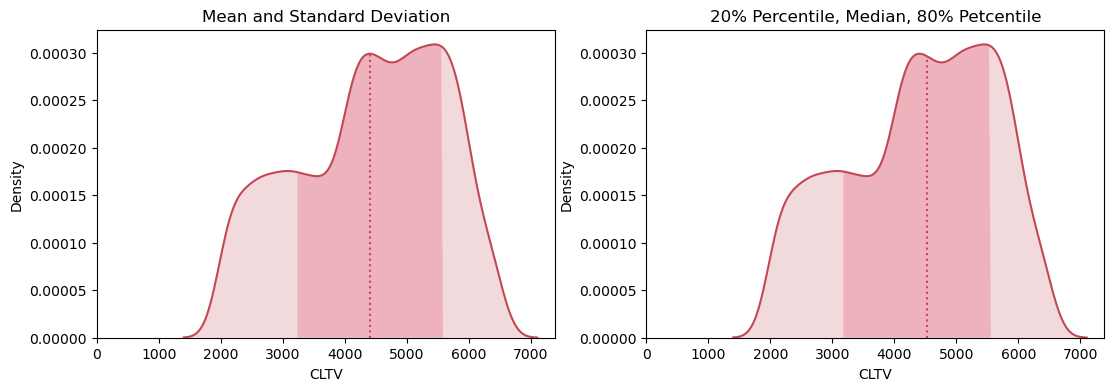

In [45]:
#plot cltv distribution
cltv = df["CLTV"]

fig, axes = plt.subplots(ncols=2,  figsize=(13,4))
for ax in axes:
    sns.kdeplot(cltv, shade=False, color='#c14953',ax=ax)
    kdeline = ax.lines[0]
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    if ax == axes[0]:
        middle = cltv.mean()
        sdev = cltv.std()
        left = middle - sdev
        right = middle + sdev
        ax.set_title('Mean and Standard Deviation')
    else:
        left,middle,right = np.percentile(cltv, [20,50,80])
        ax.set_title('20% Percentile, Median, 80% Petcentile')
    ax.vlines(middle, 0,np.interp(middle,xs,ys),color="#c14953",ls=':')
    ax.fill_between(xs, 0, ys, facecolor='#c14953', alpha=0.2)
    ax.fill_between(xs, 0,ys, where=(left <=xs) & (xs <= right), 
                   interpolate=True, facecolor='crimson', alpha=0.2)
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.5f}'))
    ax.set_ylim(ymin=0)
    ax.set_xlim(xmin=0)

    

All the customers above 20% percentile(figure on right) are profitable customers.

In [46]:
percentile20_c = np.percentile(cltv,[20])
print(percentile20_c)
print(percentile20_c)

[3175.4]
[3175.4]


numpy.ndarray

The 20% percentile is 3175.4

Now those customers are determined who have both a high churn rate(>=60%) as well as an 
appropriate customer lifetime value (>=20% percentile resp.3175.4)

In [47]:
# Define on which customers to react - based on CLTV

cltv = df["CLTV"]
# convert array of total revenues into a dataframe
df_cltv = pd.DataFrame(cltv).reset_index(drop=True)
# convert into series
df_cltv_ = df_cltv["CLTV"]

# create list for high revenue
liste_cltv20 = []   # all customers with CLTV > 20% Percentile and
                 # Churn Rate >= 60% --> "react" list
for cltv in df_cltv_:
    if cltv >= percentile20_c:
        liste_cltv20.append(1)
    else:
        liste_cltv20.append(0)

# convert list into dataframe for high revenue
df_cltv20 = pd.DataFrame(liste_cltv20, columns=["high cltv"])

# create list for action
liste_highchurn_c = []   # all customers with CLTV > 20% Percentile and
                       # Churn Rate >= 60% --> "react" list
for p in yprednn_r:
    if p >= 0.6:
        liste_highchurn_c.append(1)
    else:
        liste_highchurn_c.append(0)
        
# convert list into dataframe for high churn
df_highchurn_c = pd.DataFrame(liste_highchurn_c, columns=["high churn"])

# concat columns
df_highhigh_c = pd.concat([df_cltv20, df_highchurn_c], axis=1, ignore_index=True)

# create column for addition
df_addition_c = pd.concat([df_cltv20, df_highchurn_c, df_highhigh_c[0]+df_highhigh_c[1]], 
                         axis=1, ignore_index=True)

# convert into series
df_addition_c_ = df_addition_c[2]

# create list for reaction
liste_react_c = []   # all customers with CLTV > 20% Percentile and
                       # Churn Rate >= 60% --> "react" list
for r in df_addition_c_:
    if r >= 2:
        liste_react_c.append("yes")
    else:
        liste_react_c.append("no")


# convert list into dataframe for reaction
df_react_c = pd.DataFrame(liste_react_c, columns=["Action yes/no"])

# concat columns
df_pred_i_react_c = pd.concat([df_pred_i, df_react_c], axis=1)

# Churn Rate Category & Action yes/no column
category_action = df_pred_i_react_c[["Churn Rate Category", "Action yes/no"]]
print(category_action)

     Churn Rate Category Action yes/no
0              very high           yes
1              very high            no
2              very high           yes
3                 medium            no
4              very high           yes
...                  ...           ...
7038            very low            no
7039            very low            no
7040            very low            no
7041            very low            no
7042            very low            no

[7043 rows x 2 columns]


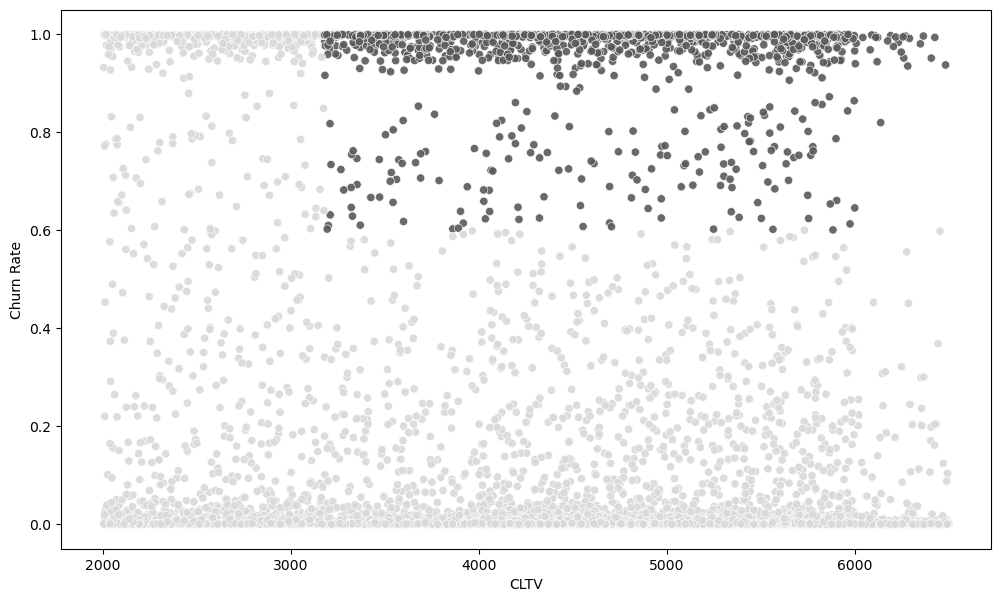

In [48]:
# Plot cltv / Churn Rate / action
plt.figure(figsize=(12,7))
plot2 = sns.scatterplot(data=df_pred_i_react_c, x="CLTV", 
                y="Churn Rate", alpha=0.9,
                hue="Action yes/no",
                palette=custom_colors_yes_no_gray,
                legend=None)

The resulting plot highlights customers in dark gray where churn is unusually high in  the top right corner, suggesting company must take more focused and cost-effective retention strategies.

#### **7. Outlook**

##### **Insight 1: Prioritize profitable high‑risk customers**  
The churn model makes it possible not only to flag customers with a high likelihood of leaving, but also to intersect this risk with CLTV. This allows sales and marketing to concentrate retention resources on customers who are both churn‑prone and financially valuable, instead of treating all high‑risk customers equally.  

**Actions for sales & marketing**  
- Build target lists that filter for “high churn probability + medium/high CLTV” and use these as the primary audience for retention campaigns.  
- De‑prioritize or automate outreach for low‑value, high‑risk customers where the expected return does not justify expensive interventions.  

***

##### **Insight 2: Short‑term, individualized retention plays**  
The model’s scores can guide **when** and **how** to contact customers to quickly reduce imminent churn risk. Timely, personalized interventions tend to be more effective than broad, generic campaigns.  

**Actions for sales & marketing**  
- Use churn scores to trigger **personalized outreach** (calls, emails, in‑app messages) shortly before contract renewal or at other risk‑sensitive moments.  
- Design **price promotions and tailored offers** (discounts, add‑on bundles, loyalty points) specifically for segments with elevated churn risk but strong revenue potential.  
- Implement **up‑selling / cross‑selling** campaigns that improve perceived value for at‑risk customers, such as upgrading to more suitable plans or bundling services rather than offering simple price cuts.  

***

##### **Insight 3: Long‑term experience and journey optimization**  
Churn patterns reflect structural issues in products, processes, or service experiences. Insights from the model and segmentation point to where the customer journey needs to be redesigned, not just temporarily patched.  

**Actions for sales & marketing**  
- Collaborate with product and service teams to **refine offerings** in segments with chronic churn (e.g., redesign plans with poor product–market fit, simplify confusing bundles).  
- Work with operations and channel partners to **streamline the sales and re‑sale process**, reducing friction at sign‑up, renewal, and upgrade moments.  
- Leverage **AI‑driven tools and customer data platforms** to personalize the journey across channels (website, app, call center, retail), making sure that messaging, offers, and next‑best‑actions reflect each customer’s churn risk and preferences.  

***

##### **Insight 4: Use sentiment analysis to uncover root causes**  
Customer feedback across social media, email, chats, and call logs contains rich signals about dissatisfaction that often precede churn. Sentiment and topic analysis can turn this unstructured data into concrete themes for marketing and CX improvements.  

**Actions for sales & marketing**  
- Implement **NLP‑based sentiment analysis** pipelines that classify incoming messages as positive, neutral, or negative and group them by topic (pricing, network quality, billing, support, etc.).  
- Feed these topics back into campaign design: for example, run focused campaigns addressing billing clarity if negative sentiment is high on that theme.  
- Set up **alerts for strongly negative sentiment** among high‑value customers and route them to specialized retention or VIP service teams.  
- Use aggregated sentiment and churn data together to prioritize strategic initiatives (e.g., fix network issues in regions where negative sentiment and churn are both elevated).  

***

##### **Insight 5: Closed‑loop measurement of retention impact**  
The combination of churn scores, CLTV, and campaign data enables a closed‑loop view of how marketing and sales actions influence churn over time.  

**Actions for sales & marketing**  
- Track **campaign‑level KPIs** such as saved customers, incremental CLTV, and churn reduction for each type of intervention (discount, bundle, personalized outreach, etc.).  
- Continuously refine audience rules, offers, and timing based on measured uplift, focusing budgets on the tactics that deliver the highest retention ROI.
***

In summary, the developed churn prediction framework, enriched with CLTV information and segment‑level analysis, offers a robust decision support tool for sales and marketing functions in the telecommunications domain. By systematically identifying high‑risk, high‑value customers and linking quantitative risk scores with qualitative signals from sentiment analysis, the approach enables targeted, economically justified retention initiatives that can enhance customer experience, reduce churn, and increase long‑term profitability. Future work may focus on integrating additional behavioral and network‑quality data, as well as real‑time scoring and intervention capabilities, to further strengthen the practical impact of churn analytics on commercial strategy.



***
***


 # **...END...**